### Project Overview: 
- You are to scrape the web to find every company in the Russell 2000 as of 2020. For mthis data you will calculate the Volatility of each security a well as the Daily Returns. From the Daily Returns calculate the top 20 dips and spikes for the index. 

- Also look for the "Penny stocks" that may show some promise in recent months. 
- If you were to have every stock in the Russell 2000 in a portfolio whick would hold them ost weight after a 10 year span

### Project Approach
- Fetch all companies in Russell 2000
- Use pndas Datareader to get the Adj Close
- Calculate the Daily returns for each security
- Find the top 20 Spikes and Dips for returns 
- Put every security into a portfolio and optimize the portfolio with 10 years back data

### libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
russ = pd.read_excel("resources/Russle_2000_2020.xlsx", index_col='Ticker')

### Data Overview 
- For 2020 we have 1999 conpanies in the Russle 2000

In [4]:
russ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, AAN to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### Adj Closes
- Will import data already fetched previously
- Will download the Adj Close for each security for 2020 beginning 2020-1-1 to current using pandas Datareader

In [7]:
tickers = list(russ.index)

In [8]:
data = pd.DataFrame()

In [14]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

In [15]:
data

,AAN,AAOI,AAON,AAT,AAWW,AAXN,ABCB,ABEO,ABG,ABM,...,YRCW,ZAGG,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,57.544491,12.500,49.715336,44.363808,27.730000,76.559998,42.455322,3.21,111.330002,38.128220,...,2.580,8.100,17.666327,52.340000,4.62,6.84,34.090000,14.76,5.880,7.920000
2020-01-03,56.846020,12.120,50.173725,45.251480,27.450001,73.930000,42.286449,2.90,108.389999,38.028980,...,2.570,8.150,17.437153,51.080002,4.50,6.84,33.830002,14.77,5.810,8.350000
2020-01-06,57.554474,12.150,50.084038,45.586823,27.430000,68.750000,42.157314,2.77,107.739998,38.019058,...,2.560,8.250,17.486971,51.200001,4.49,7.32,34.410000,14.67,5.700,8.420000
2020-01-07,57.464668,12.430,49.974426,44.718876,26.370001,69.769997,41.869251,2.57,103.790001,37.701488,...,2.550,8.100,17.546757,51.830002,4.53,7.39,34.180000,14.69,5.560,8.540000
2020-01-08,58.472469,12.700,49.834915,44.856956,27.160000,69.610001,42.365921,2.62,103.129997,38.108376,...,2.410,7.990,17.626471,52.020000,4.59,7.51,34.480000,14.66,5.310,8.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,45.570000,9.980,58.369999,32.632767,44.000000,92.790001,28.530001,2.92,81.500000,36.540001,...,2.070,3.170,12.320000,29.969999,3.11,7.36,29.459999,12.75,5.410,21.430000
2020-06-08,49.279999,10.240,57.820000,34.640629,40.560001,97.269997,29.629999,3.01,82.610001,36.750000,...,2.380,4.490,13.080000,32.040001,3.25,7.67,30.180000,12.25,5.625,22.889999
2020-06-09,48.470001,9.695,57.290001,33.090000,41.310001,100.269997,28.340000,2.90,81.519997,35.560001,...,2.120,3.910,13.380000,30.870001,3.16,7.50,28.799999,12.42,5.390,20.000000


### Getting todays Date as a variable 

In [16]:
todays_date = data[-1:].iloc[0].name

### Failed and Passed
- 54 companies failed and 1945 passed

In [17]:
passed = pd.DataFrame(passed, columns=["Tickers"])

In [18]:
passed.to_csv("resources/passed_tickers.csv")

In [19]:
len(failed)

50

In [20]:
len(passed)

1949

### Getting Penny Stocks 
- For penny stocks we will get all companies in the Russell 2000 we will take all stocks under 10 bucks to consideration as of the begining of 2020

In [21]:
penny_Stocks = data[data.apply(lambda x: x < 10)].dropna(axis = 1)

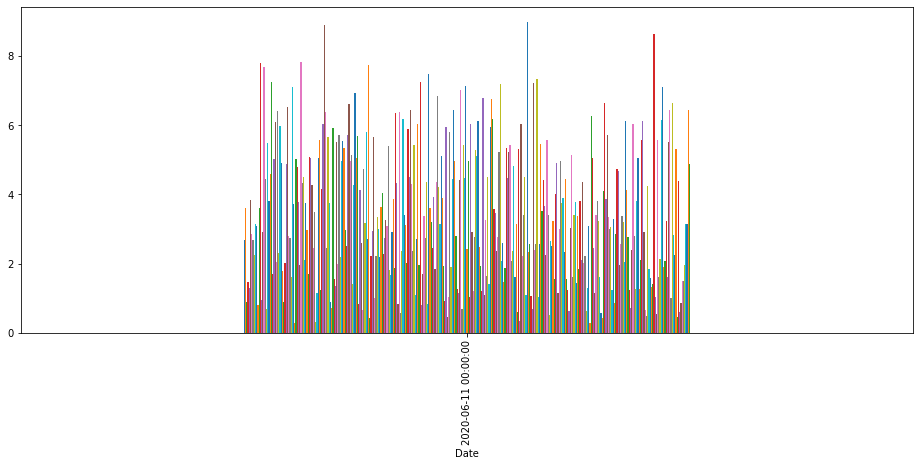

In [22]:
penny_Stocks[-1:].plot(kind = "bar", figsize = (16,6), legend = None)

## Daily Returns for PennyStocks
- We will look at the penny stocks Dips and spikes
- Will check for today's Date

In [23]:
penny_returns = penny_Stocks.pct_change()

In [24]:
top_20_penny_spikes = penny_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(20)

In [25]:
top_20_penny_spikes["Adj Close"] = data[list(top_20_penny_spikes.index)][-1:].transpose().values

In [26]:
top_20_penny_spikes.columns = ["return", "Adj Close"]

In [27]:
top_20_penny_spikes

,return,Adj Close
ACER,0.169381,3.5900
WTRH,0.092683,2.2400
YRCW,0.063043,1.9560
NEXT,0.059809,2.2150
FPRX,0.046117,4.3100
SRNE,0.042952,4.7350
BGG,0.026961,2.0950
WLL,0.021847,1.6043
TLRD,0.020161,1.2650
MNKD,0.006803,1.4800


## Penny Dips 
- Will loook at top 20 penny shares that took the biggest dips

In [28]:
top_20_penny_dips = penny_returns[-1:].transpose().sort_values(todays_date, ascending = True).head(20)

In [29]:
top_20_penny_dips["Adj Close"] = data[list(top_20_penny_dips.index)][-1:].transpose().values

In [30]:
top_20_penny_dips.columns = ["returns", " Adj Close"]

In [31]:
top_20_penny_dips.to_csv("resources/top_20_penny_dips.csv")

In [32]:
top_20_penny_dips

,returns,Adj Close
MBIO,-0.293478,3.2500
GCI,-0.245594,1.9690
JILL,-0.211361,0.7011
TUSK,-0.208602,1.8400
TELL,-0.205192,1.2399
HNRG,-0.203463,0.9200
LTRPA,-0.198387,2.4850
TCS,-0.197101,2.7700
WPG,-0.193548,1.0000
AFI,-0.192802,3.1400


### Entire Index DIPS
- We will look at the dips for the entire market

In [33]:
index_returns = data.pct_change()

In [34]:
russ_top_30_dips = index_returns[-1:].transpose().sort_values(todays_date).head(30)

In [35]:
russ_top_30_dips["Adj Close"] = data[list(russ_top_30_dips.index)][-1:].transpose()[todays_date].values

In [36]:
russ_top_30_dips.columns = ["returns", "Adj Close"]

In [37]:
russ_top_30_dips

,returns,Adj Close
MBIO,-0.293478,3.2500
GCI,-0.245594,1.9690
JILL,-0.211361,0.7011
TUSK,-0.208602,1.8400
MITT,-0.205929,4.9550
TELL,-0.205192,1.2399
HNRG,-0.203463,0.9200
BTU,-0.198581,3.6144
LTRPA,-0.198387,2.4850
TCS,-0.197101,2.7700


### Russ Spikes

In [40]:
russ_top_30_spikes = index_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(30)

In [44]:
russ_top_30_spikes["ADj Close"] = data[list(russ_top_30_spikes.index)][-1:].transpose()

In [46]:
russ_top_30_spikes.columns = ["returns", "Adj Close"]

In [47]:
 russ_top_30_spikes

,returns,Adj Close
GRPN,13.856115,20.650000
RETA,0.305912,170.970001
ACER,0.169381,3.590000
ZYXI,0.126999,23.959999
WTRH,0.092683,2.240000
YRCW,0.063043,1.956000
PFSI,0.062941,37.660000
NEXT,0.059809,2.215000
SONO,0.052224,12.489900
AMBC,0.050704,14.920000


### Russell 2000 as a portfolio - 2020
 - We want to know which 20 companies in the russell 2000 would have generated the highest returns for 2020 so far. 
 - there are a little over 1900 companies listed  in the russell 2000 
 - We will create 2000 portfolios that will contain these companies and reandomly weigh each
 - based of the daily returns of each company we can generate the expected returns as well as a sharp ratio for each portfolio in the 2000
 - USing this we will find the portfilio with the highest return, best sharp, and lowest vol

In [50]:
daily_returns = data.pct_change()

In [132]:
np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights))

nan

In [131]:
n_portfolios = 2
all_weights = np.zeros((n_portfolios, len(passed)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharp = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(daily_returns.mean() * weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

### Max Sharp

In [121]:
all_vol

array([nan, nan])

In [82]:
len(daily_returns.columns)

1949

In [84]:
all_weights

array([[4.78195761e-04, 8.50458422e-04, 4.25905677e-04, ...,
        2.97076367e-04, 3.56650973e-04, 3.62439410e-04],
       [3.82310607e-04, 7.80765879e-04, 8.10237632e-04, ...,
        2.64558726e-04, 5.80813138e-04, 2.55538646e-04],
       [1.11214728e-04, 4.13172107e-04, 2.77387857e-04, ...,
        8.35499385e-04, 1.00353526e-03, 1.67552420e-04],
       ...,
       [8.67162780e-05, 7.78356380e-04, 8.49526891e-04, ...,
        5.53994252e-05, 2.49550716e-04, 2.56961294e-04],
       [5.55246918e-05, 6.38162371e-04, 3.49017559e-04, ...,
        9.12118880e-04, 4.09848959e-04, 9.69914389e-04],
       [7.35273599e-04, 8.22280593e-05, 6.18455408e-05, ...,
        1.73483547e-04, 7.10733888e-04, 6.26117192e-05]])

In [81]:
len(passed)

1949

In [70]:
max_sharp = all_sharps.argmax()

In [71]:
max_sharp

0

In [72]:
max_return = all_returns.argmax()

In [73]:
max_return

527

In [74]:
lowest_vol = all_vol.argmin()

In [75]:
lowest_vol

0

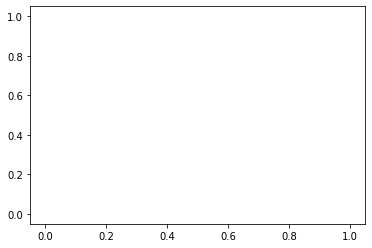

In [65]:
plt.scatter(all_vol, all_returns)